**Muhammad Andrianto Abdillah**

- **Devalopa**

# Student Activity
Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

Tugas Anda:
- Tentukan langkah pre-processing yang tepat untuk dataset di atas.
- Gunakan range `n_gram` yang berbeda. Amati apa perbedaannya.
- Menurut Anda, apakah `term` yang dihasilkan (`X_kbest_features`) pada feature selection sudah memiliki informasi yang relevan?

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa

# Pre Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 7.6 MB/s 


# Data Acquisition

Penjelasan Label Rating
* 0:  
* 1:  
* 2: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/20191002-reviews.csv')

data.head(10)

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
5,100002528,beli-harddisk-eksternal,Deden,5,NaN,NaN,NaN,0,0,0,True,16.01,02 Nov 2017,androidApp,2019-10-02
6,100002528,beli-harddisk-eksternal,Yeana,5,NaN,NaN,NaN,0,0,0,True,13.01,25 Sep 2017,mobile,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
8,100003785,beli-harddisk-eksternal,Fadjar B.,1,NaN,NaN,baru 10 bulan layarnya dah bergaris,0,0,0,True,21.49,06 Apr 2017,androidApp,2019-10-02
9,100003785,beli-harddisk-eksternal,agung p.,5,NaN,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...",0,0,0,True,19.50,01 Mar 2017,mobile,2019-10-02


In [ ]:
df = data[['rating','reviewContent']]
df.head(10)

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,5,NaN
5,5,NaN
6,5,NaN
7,1,bima
8,1,baru 10 bulan layarnya dah bergaris
9,5,"Pesan rabu sore,minggu sore sampe,,barang sesu..."


In [ ]:
df.tail(10)

,rating,reviewContent
203777,5,NaN
203778,4,NaN
203779,1,Kalo kirim ke kupang bisa gak?
203780,5,Wkwkwk
203781,1,seller incapable to keep his product page clea...
203782,5,barang bagus dengan harga kompetitif
203783,3,NaN
203784,5,NaN
203785,3,Ok.thank lazada Pagi order sore barang nyampe ...
203786,5,"semua fitur berfungsi,harganya cukup murah. AK..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating         203787 non-null  int64 
 1   reviewContent  107029 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
print('Total Jumlah review:', df.shape[0], 'data\n')
print('terdiri dari (rating):')
print('-- [1] rating 1\t:', df[df.rating == 1].shape[0], 'data')
print('-- [2] rating 2\t:', df[df.rating == 2].shape[0], 'data')
print('-- [3] rating 3\t:', df[df.rating == 3].shape[0], 'data')
print('-- [4] rating 4\t:', df[df.rating == 4].shape[0], 'data')
print('-- [5] rating 5\t:', df[df.rating == 5].shape[0], 'data\n')

Total Jumlah review: 203787 data

terdiri dari (rating):
-- [1] rating 1	: 9749 data
-- [2] rating 2	: 3382 data
-- [3] rating 3	: 7073 data
-- [4] rating 4	: 17567 data
-- [5] rating 5	: 166016 data



In [ ]:
height = df['rating'].value_counts()
height

5    166016
4     17567
1      9749
3      7073
2      3382
Name: rating, dtype: int64

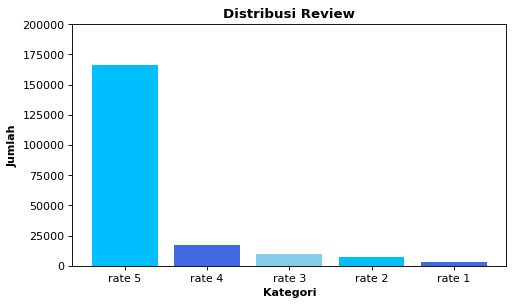

In [ ]:
height = df['rating'].value_counts()
labels = ('rate 5', 'rate 4', 'rate 3', 'rate 2', 'rate 1')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,200000)
plt.title('Distribusi Review', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

Case folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = str(text)
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
data['reviewContent'].iloc[9:20]

9     Pesan rabu sore,minggu sore sampe,,barang sesu...
10                                                  NaN
11           Mau tanya ini cicilnya pake apa ya,cc bkn?
12                Apakah TV. Tsb. Suda ada anti gores..
13    Pengirim barang tidak sesuai janji. Katanya ex...
14                                          Kualitas ok
15    Bagaimana tv LED saya merek Sharp 24 hitam LC ...
16        Pengiriman super lama.. tapi datang juga sich
17    ok barang sampai dengan Baik.. smoga terus di ...
18                                                  NaN
19                                                  NaN
Name: reviewContent, dtype: object

In [ ]:
raw_sample = data['reviewContent'].iloc[15]
case_folding = casefolding(raw_sample)

In [ ]:
print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!
Case folding	:  bagaimana tv led saya merek sharp  hitam lc lei sekarang mati total baru  bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya  soalnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih


Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-03-29 21:36:21--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2022-03-29 21:36:21 (7.87 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [ ]:
key_norm

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi
...,...,...,...
3715,3716,ywdah,ya sudah
3716,3717,ywdh,ya sudah
3717,3718,ywdhlh,ya sudahlah
3718,3719,ywis,ya sudah


In [ ]:
text_normalize(i for i in list(df['reviewContent'].iloc[10]))

TypeError: ignored

Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['lazada']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = df['reviewContent'].iloc[15]
raw_sample

'Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!'

In [ ]:
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!
Case folding		:  bagaimana tv led saya merek sharp  hitam lc lei sekarang mati total baru  bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya  soalnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih
Stopword removal	:  tv led merek sharp hitam lc lei mati total bln kemana menghubungi bantuan mohon kebijakan solusinya garansi lazada mohon bantuannya terimakasih


Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample) #tetap
print('Case folding\t\t: ', case_folding) # menghapus tanda baxa
print('Stopword removal\t: ', stopword_removal) #menghapus kata kata yg sering muncul

print('Stemming\t\t: ', text_stemming) #hapus awan dan akhiran jadi kata dasar

Raw data		:  Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!
Case folding		:  bagaimana tv led saya merek sharp  hitam lc lei sekarang mati total baru  bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya  soalnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih
Stopword removal	:  tv led merek sharp hitam lc lei mati total bln kemana menghubungi bantuan mohon kebijakan solusinya garansi lazada mohon bantuannya terimakasih
Stemming		:  tv led merek sharp hitam lc lei mati total bln mana hubung bantu mohon bijak solusi garansi lazada mohon bantu terimakasih


Text Preprocessing Pipeline

In [ ]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
 df['reviewContent'].iloc[:1000]

0                        bagus  mantap dah sesui pesanan
1                                     Bagus, sesuai foto
2                       okkkkk mantaaaaaaapppp ... goood
3                                           bagus sesuai
4                                                    NaN
                             ...                        
995                                                  NaN
996                                                 nice
997    Kami menggunakan windows 10 sedangkan  yang di...
998           Barang bagus. Dilihat nyamping tdak jelas.
999    kira kira brp lama nyampe k tempat saya kak..k...
Name: reviewContent, Length: 1000, dtype: object

In [ ]:
%%time
dfclean = df['reviewContent'].iloc[:1000]
data['clean_teks'] = dfclean.apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 1min 45s, sys: 199 ms, total: 1min 45s
Wall time: 1min 47s


In [ ]:
data[['rating', 'reviewContent', 'clean_teks']].iloc[:1000]

,rating,reviewContent,clean_teks
0,5,bagus mantap dah sesui pesanan,bagus mantap sesui pesan
1,4,"Bagus, sesuai foto",bagus sesuai foto
2,5,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood
3,4,bagus sesuai,bagus sesuai
4,5,NaN,nan
...,...,...,...
995,5,NaN,nan
996,5,nice,nice
997,1,Kami menggunakan windows 10 sedangkan yang di...,windows kirim produk windows bawah kami coba m...
998,5,Barang bagus. Dilihat nyamping tdak jelas.,barang bagus nyamping


Feature Engineerin

In [ ]:
# Pisahkan kolom feature dan target
X = data['clean_teks'].iloc[:1000]
y = data['rating'].iloc[:1000]

In [ ]:
X

0                               bagus mantap sesui pesan
1                                      bagus sesuai foto
2                           okkkkk mantaaaaaaapppp goood
3                                           bagus sesuai
4                                                    nan
                             ...                        
995                                                  nan
996                                                 nice
997    windows kirim produk windows bawah kami coba m...
998                                barang bagus nyamping
999                       k kakkalo kirim rusak or pecah
Name: clean_teks, Length: 1000, dtype: object

In [ ]:
y

0      5
1      4
2      5
3      4
4      5
      ..
995    5
996    5
997    1
998    5
999    3
Name: rating, Length: 1000, dtype: int64

## Feature Extraction (Bag of Words & N-Gram)
Proses mengubah teks menjadi vektor menggunakan metode BoW

In [ ]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
vec = CountVectorizer(ngram_range=(1,1))
vec.fit(X)

CountVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(vec.get_feature_names_out()))

1065


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(vec.get_feature_names_out())

['abang' 'aceh' 'adaada' ... 'yanpa' 'yapersyaratan' 'youtube']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_unigram = vec.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_unigram = pd.DataFrame(X_unigram, columns=vec.get_feature_names_out())
data_unigram.shape

(1000, 1065)

In [ ]:
data_unigram

,abang,aceh,adaada,adahanya,adata,add,admin,agustus,air,ajaaaaa,...,write,wslaupun,ya,yaa,yacc,yah,yampe,yanpa,yapersyaratan,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('bow.pickle', 'wb') as output:
  pickle.dump(X_unigram, output)

In [ ]:
vec = CountVectorizer(ngram_range=(2,3))
vec.fit(X)

CountVectorizer(ngram_range=(2, 3))

In [ ]:
X_unigram = vec.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_unigram = pd.DataFrame(X_unigram, columns=vec.get_feature_names_out())
data_unigram.shape

(1000, 4658)

In [ ]:
data_unigram

,abang gojek,abang gojek nya,abang kurir,abang kurir nyolot,aceh utara,aceh utara barang,adaada tigas,adaada tigas ramah,adahanya terang,adahanya terang dus,...,yah pokok,yah pokok nya,yampe slamt,yampe slamt aman,yanpa kartu,yanpa kartu kridittp,yapersyaratan kredit,yapersyaratan kredit ya,youtube situs,youtube situs berita
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF IDF

In [ ]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

1065


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['abang' 'aceh' 'adaada' ... 'yanpa' 'yapersyaratan' 'youtube']


In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()

X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,abang,aceh,adaada,adahanya,adata,add,admin,agustus,air,ajaaaaa,...,write,wslaupun,ya,yaa,yacc,yah,yampe,yanpa,yapersyaratan,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

Feature selection

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)


In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 1065
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,4.617246
1,2.418362
2,2.418362
3,1.976722
4,0.174844
...,...
1060,3.434808
1061,0.142413
1062,2.665043
1063,6.246529


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,4.617246,abang
1,2.418362,aceh
2,2.418362,adaada
3,1.976722,adahanya
4,0.174844,adata
...,...,...
1060,3.434808,yah
1061,0.142413,yampe
1062,2.665043,yanpa
1063,6.246529,yapersyaratan


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
952,43.252927,tera
632,31.259481,nan
935,27.395423,tanggal
470,27.146750,klwdi
432,27.146750,karawang
...,...,...
615,0.051274,more
1048,0.051274,without
415,0.051274,just
355,0.051274,how


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['abang',
 'aceh',
 'adaada',
 'adahanya',
 'adata',
 'add',
 'admin',
 'agustus',
 'air',
 'ajaaaaa',
 'akun',
 'alamat',
 'alesan',
 'alhamdulillaah',
 'alhamdulillah',
 'alias',
 'alngkah',
 'aman',
 'amanah',
 'ambil',
 'amiin',
 'amin',
 'ampas',
 'an',
 'anak',
 'and',
 'antar',
 'anter',
 'anti',
 'antivirusnya',
 'ap',
 'apa',
 'aplikasi',
 'april',
 'aqua',
 'aquanya',
 'aquos',
 'arrived',
 'aryo',
 'asalasalan',
 'asli',
 'aslialias',
 'aspal',
 'asus',
 'atur',
 'aturany',
 'audio',
 'awet',
 'awetpengepakanya',
 'baca',
 'backpack',
 'bad',
 'bagis',
 'bagus',
 'bagusjos',
 'baguss',
 'bagusss',
 'bagussuara',
 'bahasa',
 'baik',
 'baikkk',
 'bandung',
 'bang',
 'banget',
 'bangetbarang',
 'bangett',
 'bangetz',
 'bangt',
 'banting',
 'bantu',
 'bantuany',
 'banyaktapi',
 'barang',
 'barangny',
 'barangnyacma',
 'barangx',
 'barng',
 'batal',
 'batalin',
 'baut',
 'bawa',
 'bawah',
 'bayar',
 'bebarengan',
 'bebas',
 'beda',
 'bekas',
 'belah',
 'belanja',
 'beli',
 'benar

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abang,aceh,adaada,adahanya,adata,add,admin,agustus,air,ajaaaaa,...,worth,wrap,wslaupun,ya,yaa,yacc,yah,yampe,yanpa,yapersyaratan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('best_feature.pickle', 'wb') as output:
  pickle.dump(X_kbest_features, output)

In [ ]:
X_kbest_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
output

<_io.BufferedWriter name='best_feature.pickle'>